# Lab Course Machine Learning Exercise Sheet 8 - Arailym Kaiyrova
### Exercise 1: Optical Character Recognition via Neural Networks

In [1]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import random

First MNIST dataset was loaded from sklearn datasets library, and visualization of one them can be seen below

<Figure size 432x288 with 0 Axes>

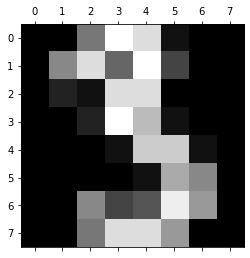

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.gray()
plt.matshow(digits.images[3])
plt.show()

Input, and target values of loaded dataset was splitted into train and test sets

In [3]:
from sklearn.model_selection import train_test_split

X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                     random_state=1)

K cross validation with k = 5 was builded from sklearn library

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

Hyperparameter space for MLP classifer, and hyperparameters selected for tuning are max_iteration number, initial learning rate, regularization value, and optimizer

In [5]:
space = {'solver': ['sgd', 'lbfgs', 'adam'],
         'alpha': [1, 0.1, 0.001, 0.0001],
         'learning_rate_init': [0.01, 0.001, 0.0001],
         'max_iter': [300, 500]}

Hyperparameter selection method from sklearn library 'RandomizedSearchCV' was used that randomly selects the best hyperparameter combination from the space above with pre-builded sklearn MLP classifier model.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

model = MLPClassifier(random_state=1)


search = RandomizedSearchCV(model, space, scoring='accuracy' , cv=kf, random_state=1)

# execute search
result = search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

Below, it can be seen the best hyperparameter selection, with its accuracy score. Also, this best hyperparameter combination gives the accuracy of 0.9755 on unseen data

In [7]:
# summarize result
print('Best Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)

y_test_pred = search.predict(X_test)
test_score = search.score(X_test, y_test)
print('Test Accuracy with best hyperparameters:', test_score)

Best Score: 0.9814374225526642
Best Hyperparameters: {'solver': 'lbfgs', 'max_iter': 500, 'learning_rate_init': 0.001, 'alpha': 1}
Test Accuracy with best hyperparameters: 0.9755555555555555
